In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/School/d. Undergrad/Year 2/Spring/CSC 240/Homework4/wine.data')

Because this dataset is composed of properly formatted continuous variables, I don't have much cleaning to do beyond standardization.

In [ ]:
#check for missing values
df.isnull().sum()

class                           0
alcohol                         0
malic acid                      0
ash                             0
alcalinity of ash               0
magnesium                       0
total phenols                   0
flavanoids                      0
nonflavanoid phenols            0
proanthocyanins                 0
color intensity                 0
hue                             0
OD280/OD315 of diluted wines    0
proline                         0
dtype: int64

This dataset has no missing or null values (neat!!).

# Naive Bayes Classifier

In [ ]:
#declare feature vecor and target variable
X = df.drop(['class'],axis = 1)
Y = df['class']

In [ ]:
#split data into separate training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=0)

In [ ]:
#check the shape of the training and testing sets
X_train.shape, X_test.shape

((124, 13), (54, 13))

## Feature Scaling

In [ ]:
cols = X_train.columns

In [ ]:
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [ ]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [ ]:
X_train.head()

,alcohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,OD280/OD315 of diluted wines,proline
0,0.524462,-0.015244,0.000000,-0.616216,0.173913,0.422680,0.480826,-0.388889,0.191489,-0.225564,0.441176,0.964427,0.771654
1,-0.641879,-0.362805,-1.235294,-0.097297,-0.347826,0.164948,-0.014749,0.277778,0.744681,-0.556391,-0.294118,0.189723,-0.746457
2,0.180039,1.460366,-0.294118,0.118919,1.275362,-0.628866,-0.811209,0.500000,-0.290780,1.699248,-1.088235,-0.964427,0.351706
3,0.093933,1.027439,-0.617647,0.335135,0.231884,-0.721649,-0.893805,0.500000,-0.361702,-0.165414,-1.058824,-0.869565,0.341207
4,0.641879,-0.228659,0.911765,1.200000,-0.695652,0.773196,0.469027,-0.722222,0.446809,-0.351880,1.176471,0.300395,-0.540682


## Model Training

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train,Y_train)

GaussianNB()

## Predict the results

In [ ]:
Y_pred = gnb.predict(X_test)
Y_pred

array([1, 3, 2, 1, 2, 2, 1, 3, 2, 2, 3, 3, 1, 1, 3, 2, 1, 1, 3, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1, 3, 2, 2, 3, 1, 1, 2, 2,
       2, 1, 3, 2, 3, 1, 3, 3, 1, 3])

## Check accuracy score

In [ ]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, Y_pred)))

Model accuracy score: 0.9444


In [ ]:
#compare the train-set and test-set accuracy
#metric to check for overfitting

Y_pred_train = gnb.predict(X_train)
Y_pred_train

array([1, 2, 3, 3, 2, 3, 3, 1, 3, 3, 2, 2, 3, 2, 1, 2, 2, 2, 1, 1, 2, 2,
       3, 3, 2, 2, 2, 3, 3, 1, 3, 2, 2, 2, 2, 2, 1, 1, 2, 1, 3, 1, 3, 1,
       1, 2, 1, 2, 2, 1, 3, 2, 1, 2, 2, 2, 3, 1, 3, 3, 1, 1, 2, 3, 1, 1,
       2, 2, 1, 1, 1, 3, 2, 1, 2, 3, 1, 2, 3, 3, 1, 1, 3, 1, 3, 2, 1, 1,
       2, 1, 3, 2, 3, 1, 3, 3, 3, 1, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 3, 3,
       1, 1, 3, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 3])

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(Y_train, Y_pred_train)))

Training-set accuracy score: 0.9839


In [ ]:
#check for overfitting and underfitting
print('Training set score: {:.4f}'.format(gnb.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test, Y_test)))

Training set score: 0.9839
Test set score: 0.9444


## Compare model accuracy with null accuracy.

In [ ]:
#check class distribution in test set
Y_test.value_counts()

2    22
1    19
3    13
Name: class, dtype: int64

We can see that the occurrences of the most frequent class is 22, so we can calculate null accuracy by dividing 22 by the total number of occurrences.

In [ ]:
#check null accuracy score

null_accuracy = (22/(22+19+13))
print('Null accuracy score: {0:0.4f}'.format(null_accuracy))

Null accuracy score: 0.4074


The null accuracy is very low (about 41%), so we can say that the Gaussian Naive Bayes Classification model is doing a very good job at predicting the class labels.

## Confusion Matrix
A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form. 

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:

**True Positives:** True positives occur when we predict an observvation belongs to a certain class and the observation actually belongs to that class.

**True Negatives:** when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

**False Positives:** when we predict an observation belongs to a certain class but the obserbation actually does not belong to that class. This type of error is called a Type 1 error.

**False Negatives:** when we predict an observation does not belong to a certain class, but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

In [ ]:
#print the confusion matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test,Y_pred)

print('Confusion matrix\n\n',cm)
print('\nTrue Positives = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[19  0  0]
 [ 2 19  1]
 [ 0  0 13]]

True Positives =  19

True Negatives(TN) =  19

False Positives(FP) =  0

False Negatives(FN) =  2


## Classification Matrices

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           1       0.90      1.00      0.95        19
           2       1.00      0.86      0.93        22
           3       0.93      1.00      0.96        13

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.95        54
weighted avg       0.95      0.94      0.94        54



In [ ]:
# classification accuracy
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [ ]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9500


In [ ]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0500


### Precision
**Precision** can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives to the sum of true and false positives.

So, **precision** identifies the proportion of correctly predicted positive outcomes. It is more concerned with the positive class than the negative class.

In [ ]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 1.0000


### Recall
Recall can be defined as the percentage of correctly predicted positive outcomes of all the actual positive outcomes. It can be given as the ratio of true positives to the sum of true positives and false negatives. Recall is also called "sensitivity".

Recall identifies the proportion of correctly predicted actual positives.

In [ ]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9048


### False Positive Rate

In [ ]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.0000


### Specificity

In [ ]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 1.0000


## Calculate Class Probabilities

In [ ]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = gnb.predict_proba(X_test)[0:10]

y_pred_prob

array([[9.99999998e-01, 2.06983161e-09, 1.58501611e-29],
       [3.10667583e-22, 4.30594790e-26, 1.00000000e+00],
       [1.34257309e-02, 9.86574269e-01, 1.85958179e-32],
       [1.00000000e+00, 1.82585902e-10, 1.58185022e-30],
       [3.89709727e-08, 9.99999961e-01, 1.52996202e-17],
       [6.78282956e-06, 9.99993217e-01, 5.98326782e-64],
       [1.00000000e+00, 2.37250176e-10, 3.72199273e-34],
       [6.36947192e-23, 5.63482657e-13, 1.00000000e+00],
       [4.58050469e-09, 9.99999995e-01, 3.90681968e-16],
       [1.87459391e-14, 9.99999836e-01, 1.63818712e-07]])

In [ ]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - 1', 'Prob of - 2', 'Prob of - 3'])

y_pred_prob_df

,Prob of - 1,Prob of - 2,Prob of - 3
0,1.000000e+00,2.069832e-09,1.585016e-29
1,3.106676e-22,4.305948e-26,1.000000e+00
2,1.342573e-02,9.865743e-01,1.859582e-32
3,1.000000e+00,1.825859e-10,1.581850e-30
4,3.897097e-08,1.000000e+00,1.529962e-17
5,6.782830e-06,9.999932e-01,5.983268e-64
6,1.000000e+00,2.372502e-10,3.721993e-34
7,6.369472e-23,5.634827e-13,1.000000e+00
8,4.580505e-09,1.000000e+00,3.906820e-16
9,1.874594e-14,9.999998e-01,1.638187e-07


In [ ]:
# print the first 10 predicted probabilities for class 1 - Probability of >50K

gnb.predict_proba(X_test)[0:10, 1]

array([2.06983161e-09, 4.30594790e-26, 9.86574269e-01, 1.82585902e-10,
       9.99999961e-01, 9.99993217e-01, 2.37250176e-10, 5.63482657e-13,
       9.99999995e-01, 9.99999836e-01])

In [ ]:
# store the predicted probabilities for class 1 - Probability of 1

y_pred1 = gnb.predict_proba(X_test)[:, 1]

y_pred1

array([2.06983161e-09, 4.30594790e-26, 9.86574269e-01, 1.82585902e-10,
       9.99999961e-01, 9.99993217e-01, 2.37250176e-10, 5.63482657e-13,
       9.99999995e-01, 9.99999836e-01, 1.97313745e-05, 3.80649583e-09,
       3.14893603e-18, 2.88179813e-01, 1.80300774e-17, 1.00000000e+00,
       4.30309551e-07, 5.56295289e-27, 2.43108873e-01, 2.26228048e-11,
       1.50162478e-01, 5.21162419e-04, 5.37606682e-02, 9.99998137e-01,
       9.99991437e-01, 9.99999916e-01, 9.99998320e-01, 1.00000000e+00,
       1.00000000e+00, 9.66874961e-23, 2.11187923e-08, 8.09303574e-12,
       9.99992089e-01, 5.18425386e-08, 3.44989960e-10, 1.79519391e-05,
       3.41203022e-08, 9.98214058e-01, 9.99999829e-01, 2.36237729e-14,
       4.05185666e-03, 3.48552179e-11, 9.99999101e-01, 9.99999999e-01,
       1.00000000e+00, 9.67379237e-07, 5.50220367e-12, 9.98509643e-01,
       5.58551676e-14, 2.71945003e-13, 1.29281588e-06, 8.84332906e-09,
       8.93713287e-09, 3.00591787e-34])

Text(0, 0.5, 'Frequency')

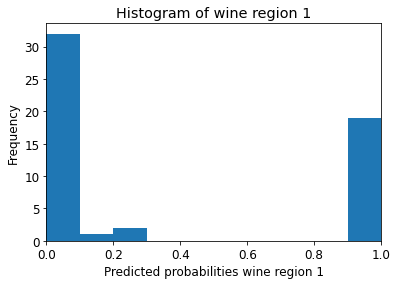

In [ ]:
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of wine region 1')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities wine region 1')
plt.ylabel('Frequency')

## ROC - AUC

Another tool to measure the classification model performance visually is ROC Curve. ROC Curve stands for Receiver Operating Characteristic Curve. An ROC Curve is a plot which shows the performance of a classification model at various classification threshold levels.

The ROC Curve plots the True Positive Rate against the False Positive Rate at various threshold levels.

In the ROC Curve, we will focus on the True Positive Rate and False Positive Rate of a single point. This will give us the general performance of the ROC curve which consists of the TPR and FPR at various threshold levels. So, an ROC Curve plots TPR vs FPR at different classification threshold levels. If we lower the threshold levels, it may result in more items being classified as positive. It will increase both Ture Positives and False Positives.

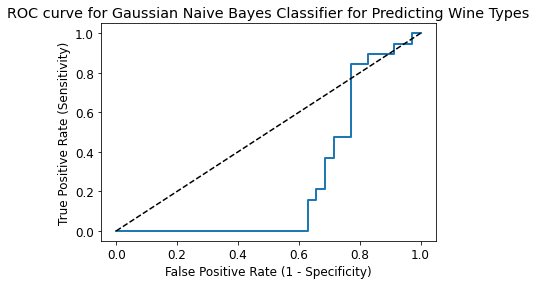

In [ ]:
# plot ROC Curve (even though it doesn't really make sense to with a multiclass classification problem)
# I did one though, just because

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(Y_test, y_pred1, pos_label = 1)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Wine Types')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

I will be disregarding how terrible this graph looks because there is not enough data to populate it correctly, and it's also one part of a three dimensional classification analysis, so it really just doesn't make sense to draw any conclusions from it.

In [ ]:
# calculate the area under the curve
# a perfect classifier will have an AUC equal to one, and a purely random one will have an AUN equal to 0.5

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(Y_test, gnb.predict_proba(X_test),multi_class='ovr') 

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 1.0000


The AUC approaches 1, so we can conclude that the classifier does a good job at predicting what region the wine is from. I calculated this using the multi-dimensional classification method, so it does actually make sense.

# Decision Trees

## Training and Visualizing a Decision Tree

In [ ]:
Y_train.to_frame()
Y_train = Y_train.astype('str')

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz

#cleaning is already done, use the same dataframes as the Bayes Classifier
tree_clf = DecisionTreeClassifier(random_state = 0)
tree_clf.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=0)

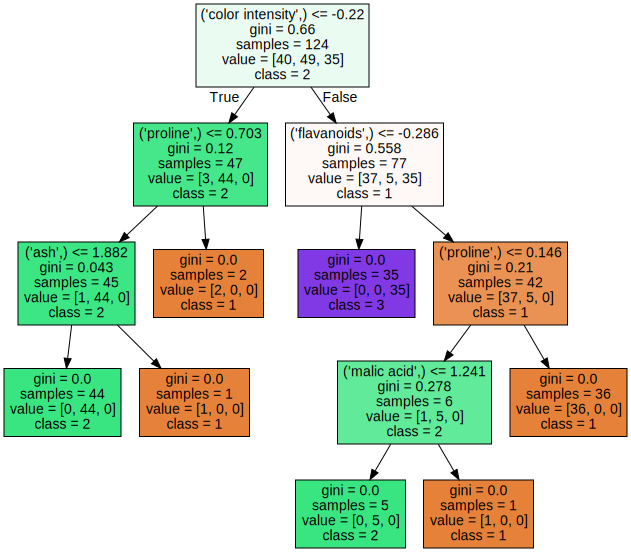

<Figure size 432x288 with 0 Axes>

In [ ]:
#Visualize the trained decision tree by export_graphviz() method

from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

labels = X_train.columns
graph = Source(tree.export_graphviz(tree_clf, feature_names = labels, class_names = Y_train.unique(), max_depth = None, filled = True))
display(SVG(graph.pipe(format = 'svg')))

plt.savefig("/content/drive/MyDrive/School/d. Undergrad/Year 2/Spring/CSC 240/Homework4/DecisionTree.png")

## Making Predictions

The classification starts at the root node and checks whether the proline level is less than or equal to 755.0. If true, it moves down to the root's left child node (depth 1, left). It then continues with this behavior until it reaches a leaf node, which predicts the class of the wine.



*   **Samples:** counts how many training instances it applies to. 
*   **Value:** tells us how many training instances of each class this node applies to.
*   **Gini:** measures impurity: a node is "pure" (gini = 0) if all training instances it applies to belong to the same class.
*   **Entropy:** by default, gini impurity measure is used, but we can select the entropy impurity measure instead by setting the ctriterion hyperparameter to "entropy". A set's entropy is zero when it contains instances of only one class. 

**Note:** a node's gini impurity is generally lower than its parent's. This is ensured by the CART training algorithm's cost function, which splits each node in a way that minimizes the weighted sum of its children's gini impurities. However, if one child is smaller than the other, it is possible for it to have a higher gini impurity than its parent, as long as this increase is more than compensated for by a decrease of the other child's impurity.

**Gini impurity or entropy?**
Most of the time it does not make a big difference; they usually lead to similar trees. Gini imprity is slightly faster to compute, so it is a good default. However, gini impurity tends to isolate the most frequent class in its own branch of the tree, whil entropy tends to produce slightly more balanced trees.




## Estimating Class / Class Probabilities

Decision trees can estimate the probability that an instance belongs to a particular class k: it traverses the tree to find the leaf node for this instance and returns the ratio of training instances of class k in this node. 

In [ ]:
tree_pred = tree_clf.predict(X_test)
tree_train_pred = tree_clf.predict(X_train)

In [ ]:
print("Model accuracy: ")
print(accuracy_score(Y_test.astype('str'), tree_pred))

print("Training set accuracy: ")
print(accuracy_score(Y_train, tree_train_pred))

print("Testing set classification report: \n")
print(classification_report(Y_test.astype('str'),tree_pred))

print("Training set classification report: \n")
print(classification_report(Y_train.astype('str'),tree_train_pred))

Model accuracy: 
0.9444444444444444
Training set accuracy: 
1.0
Testing set classification report: 

              precision    recall  f1-score   support

           1       1.00      0.89      0.94        19
           2       0.91      0.95      0.93        22
           3       0.93      1.00      0.96        13

    accuracy                           0.94        54
   macro avg       0.95      0.95      0.95        54
weighted avg       0.95      0.94      0.94        54

Training set classification report: 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        49
           3       1.00      1.00      1.00        35

    accuracy                           1.00       124
   macro avg       1.00      1.00      1.00       124
weighted avg       1.00      1.00      1.00       124



The model fits the training set perfectly, and fits the testing set with an accuracy of 94%. The discrepancy between those two scores is not terribly high, especially considering the smallish size of the data set. Therefore I feel comfortable concluding that there is no severe overfitting happening in this model, and it should likely perform well on all similar wine data.

In [ ]:

ROC_AUC = roc_auc_score(Y_test, gnb.predict_proba(X_test),multi_class='ovr') 

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 1.0000


The ROC area under the curve came out to be 1.00 again, which indicates a perfect (or at least very close to perfect) fit of the testing data.